# Data Preprocessing

Data preprocessing invloves cleaning and engineering data in a way that it can be used as input to several
important data science tasks such as data visualisations,machine learning ,deep learning and data analytics.

Some of the most common data preparation tasks include feature scaling, handling missing values,
categorical variable encoding, data discretization, etc

 income and height - diff scales of measurement 

 feature scaling - to bring all variables to same scale--
 1st process- Standardization -> is the process of centering a variable at zero and standardizing the data 
 variance to 1.
 Feature scaling is applied on numerical columns only

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
titanic_data = titanic_data[['age','fare','pclass']]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [57]:
#to standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [58]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<AxesSubplot:xlabel='age', ylabel='Density'>

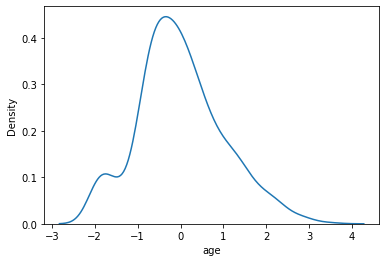

In [59]:
#Density plot
sns.kdeplot(titanic_data_scaled['age'])

In [60]:
#Min/Max Scaler
#here we subtract each value by the min value and then divide the result by the difference of min and max value

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [61]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<AxesSubplot:xlabel='age', ylabel='Density'>

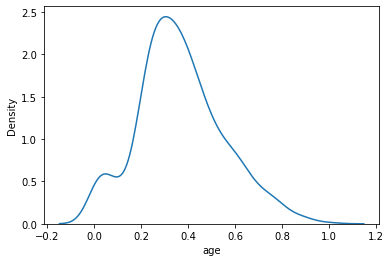

In [62]:
sns.kdeplot(titanic_data_scaled['age'])

Handling missing data - missing data are those observations in the dataset that do not contain any value

Handling missing numerical data
this is called IMPUTATION

1st method --- mean or median imputation :in mean or median imputation missing values in a column are replaced
by the mean or median of all the remaining values in a particular column

In [63]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
titanic_data = titanic_data[['survived','pclass',
                            'age','fare']]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [65]:
titanic_data.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [66]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [67]:
median = titanic_data.age.median()
print(median)
mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [68]:
titanic_data['Median_Age'] = titanic_data.age.fillna(median)
titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)
titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.000000
1,1,1,38.0,71.2833,38.0,38.000000
2,1,3,26.0,7.9250,26.0,26.000000
3,1,1,35.0,53.1000,35.0,35.000000
4,0,3,35.0,8.0500,35.0,35.000000
5,0,3,NaN,8.4583,28.0,29.699118
6,0,1,54.0,51.8625,54.0,54.000000
7,0,3,2.0,21.0750,2.0,2.000000
8,1,3,27.0,11.1333,27.0,27.000000
9,1,2,14.0,30.0708,14.0,14.000000


In [69]:
# frequent category imputation - categorical variables
titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[['embark_town','age','fare']]
titanic_data.head()

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500


In [70]:
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

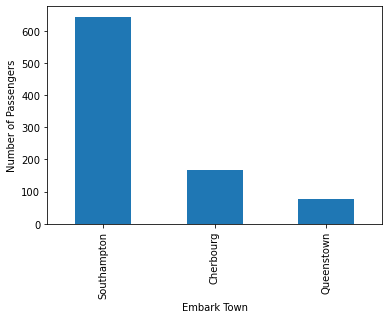

In [71]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

In [72]:
titanic_data.embark_town.fillna("Southampton",inplace = True)

In [73]:
titanic_data.isnull().mean()

embark_town    0.000000
age            0.198653
fare           0.000000
dtype: float64

In [74]:
titanic_data = sns.load_dataset("titanic")
titanic_data = titanic_data[['embark_town','age','fare']]
titanic_data.head()

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500


In [75]:
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [76]:
titanic_data.embark_town.fillna('Missing',inplace = True)

Text(0, 0.5, 'Number of Passengers')

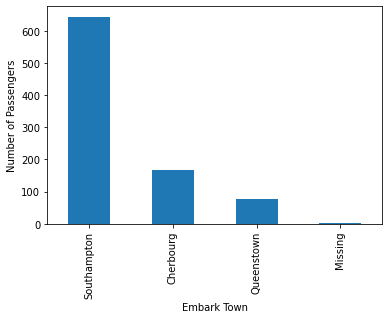

In [77]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

categorical data encoding
first part: one hot encoding --- in this for each unique value in the categorical column a new column is added.
integer 1 is added to the column that corresponds to original label and all the remaining columns are filled with zeros

In [78]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
titanic_data = titanic_data[['sex','class','embark_town']]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [80]:
# get_dummies
temp = pd.get_dummies(titanic_data['sex'])
temp.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [81]:
temp = pd.get_dummies(titanic_data['embark_town'])
temp.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


 you can have n-1 encoded columns for the categorical column that contains n unique labels

In [82]:
temp = pd.get_dummies(titanic_data['embark_town'],drop_first=True)
temp.head()

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Label Encoding - in label encoding labels are replaced by integers. That is why label encoding is also called as
integer enoding

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(titanic_data['class'])
titanic_data['le_class'] = le.transform(titanic_data['class'])
titanic_data.head(20)

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2
5,male,Third,Queenstown,2
6,male,First,Southampton,0
7,male,Third,Southampton,2
8,female,Third,Southampton,2
9,female,Second,Cherbourg,1


# Data Discretization

The process of converting continuous numeric values such as price,age,weight into disctrete intervals is called discretization or binning.

There are vairous ways perform discretization - equal width discretization and equal frequency discretization

Equal width discretization is the most common approach for binning
In this the width or the sides of all the intervals remain the same. An intervel is also called a bin.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [85]:
diamond_data = sns.load_dataset('diamonds')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We will perform discretization on the price column

C:\Users\matth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

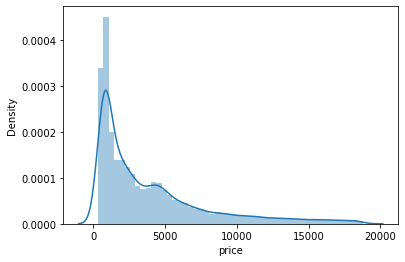

In [86]:
sns.distplot(diamond_data['price'])

The histogram shows for the price column dataset is positively skewed

Find the total price range by subtracting the minimumprice from the maximum price

In [87]:
price_range = diamond_data['price'].max()-diamond_data['price'].min()
print(price_range)

18497


the price range is 18497, now we will create 10 equal width intervels

In [88]:
price_range/10

1849.7

In [89]:
lower_intervel = int(np.floor(diamond_data['price'].min()))
upper_intervel = int(np.ceil(diamond_data['price'].max()))
intervel_length = int(np.round(price_range/10))
print(lower_intervel)
print(upper_intervel)
print(intervel_length)

326
18823
1850


In [90]:
total_bins = [i for i in range(lower_intervel,upper_intervel+intervel_length,intervel_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


Next we will create string labels for each bin

In [91]:
bin_labels = ["Bin_no_"+str(i) for i in range(1,len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


Using the pd.cut() method to convert continuous column values to numeric bin values

In [92]:
diamond_data['price_bins'] = pd.cut(x = diamond_data['price'],bins = total_bins,labels = bin_labels,include_lowest=True)
diamond_data.tail(20)


,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
53920,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49,Bin_no_2
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53,Bin_no_2
53922,0.70,Very Good,D,VS1,63.1,59.0,2755,5.67,5.58,3.55,Bin_no_2
53923,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57,Bin_no_2
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59,Bin_no_2
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67,Bin_no_2
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54,Bin_no_2
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54,Bin_no_2
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68,Bin_no_2
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53,Bin_no_2


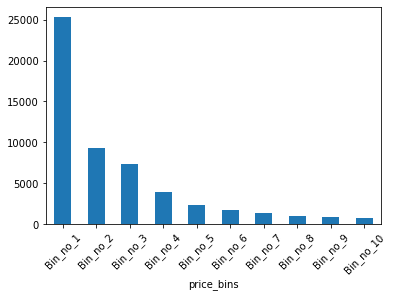

In [93]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)
plt.show()

Handling Outliers - Outliers are the values that are far from the rest of the observations in the columns. Outliers can occur due to various reasons.

There are four main techniques to handle outliers:

1- you can either totally remove the outliers from the dataset

2- you can treat outliers as missing values and then apply any data imputation technique that we studied earlier

3- you can also appply discretization techniques to a dataset that will include outliers along with other data points at the tail

4- you can cap or censor the outliers and replace them with max and min values that can be found via several techniques

Outlier Trimming - it refers to simply removing the outliers beyond a certain threshold value. One of the main advantage of
oulier trimming is that it is extremely quick and doesn't distort the data.

A downside to outlier trimming is that it can reduce the data size

There are various ways to find the threshold for outlier trimming 

In [94]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We will try to remove outliers from the age column

To visualise the outliers, you can plot the box plot for the age column

Five number theory- min max, Q1,Q3 and Q2 (median) 

<AxesSubplot:ylabel='age'>

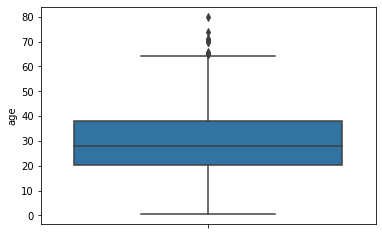

In [95]:
sns.boxplot(y='age',data = titanic_data)

You can see that there are few outliers in the form of black dots at the upper end of the age ditribution in the box-plot

To remove outliers, we first need to define the values that will be considered as outliers

One of the most common way to do so is to find the IQR (Inter Quartile Range)

In [96]:
IQR = titanic_data['age'].quantile(0.75)-titanic_data['age'].quantile(0.25)
lower_age_limit = titanic_data['age'].quantile(0.25)-(IQR*1.5)
upper_age_limit = titanic_data['age'].quantile(0.75)+(IQR*1.5)

print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


The output shows that any value large than 64.81 and smaller than -6.68 will be considered as an outlier

The below script find the rows containint the outlier values/

In [97]:
age_outliers = np.where(titanic_data['age']>upper_age_limit,True,np.where(titanic_data['age']<lower_age_limit,True,False))


In [98]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers)]

In [99]:
titanic_data.shape,titanic_without_age_outliers.shape

((891, 15), (880, 15))

<AxesSubplot:ylabel='age'>

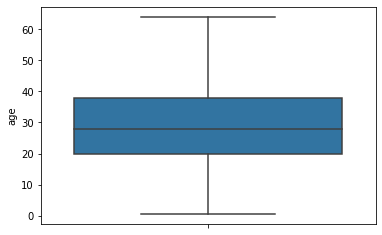

In [100]:
sns.boxplot(y='age',data = titanic_without_age_outliers)

Outlier caping using Mean and Std dev

Instead of using IQR, the upper and lower thresholds for the outliers can be calculated via the mean and standard deviation method. To find the upper threshold the mean of the data is added to 3 times the std dev.

Similarly to find the lower threshold you have to multiply the std dev by 3 and then remove the result from the mean

<AxesSubplot:ylabel='age'>

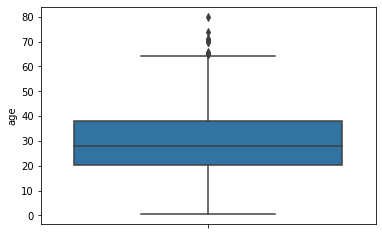

In [101]:
titanic_data = sns.load_dataset('titanic')
sns.boxplot(y = 'age',data = titanic_data)

The below script find the upper and lower threshold for the age column of the titanic dataset, using the mean and standard deviation

In [102]:
lower_age_limit = titanic_data['age'].mean()-(3*titanic_data['age'].std())
upper_age_limit = titanic_data['age'].mean()+(3*titanic_data['age'].std())
print(lower_age_limit)
print(upper_age_limit)

-13.88037434994331
73.27860964406095


In [103]:
titanic_data['age'] = np.where(titanic_data['age']>upper_age_limit,upper_age_limit,
                              np.where(titanic_data['age']<lower_age_limit,lower_age_limit,titanic_data['age']))

<AxesSubplot:ylabel='age'>

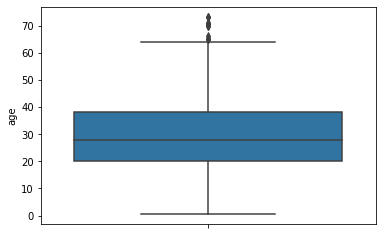

In [104]:
sns.boxplot(y='age',data = titanic_data)

The box plot show that we still have some outliers values after applying mean and standard deviation capping on the age column of the titanic dataset

-----------------------------------------------------------------------------------------------------------------------

# Feature Selection

Feature selection with Python Scikit lean library

Machine learning algorithms learn from datasets. A dataset consists of features. Features are also known as attributes.

For instance a dataset of cars has features like car model, car color, seating capacty, price, etc. Selecting the right set of features can not only improve performance of the ML model but also speed up the training time of the algorithm

1) Feature selection based on variance

Features that are very similar should be removed from the dataset. There are various ways to remove very similar features from the dataset. One of the way is to find the variance of a particular feature and remove features having variance less than a certain threshold. A feature with low variance has a higher degree of similarity among its data points and vice-versa

In [105]:
wine_data = pd.read_csv("winequality-red (1).csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The output shows that the dataset had 12 columns. Next we divide the data into the feature and label set  


In [106]:
features = wine_data.drop(['quality'],axis = 1)
labels = wine_data.filter(['quality'],axis = 1)
# here features include all independent variables and labels includes the dependent variables like QUALITY

Feature selection based on variance does not depend upon the output label. Variance shows how far a set of data is spread out

In [107]:
features.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

Vaiance threshold class

In [108]:
from sklearn.feature_selection import VarianceThreshold
var_sel = VarianceThreshold(threshold=(0.1))
var_sel.fit(features)

VarianceThreshold(threshold=0.1)

To get the selected features you need to call the get_support() method of the VarianceThreshold class

In [109]:
attributes_to_retain = features.columns[var_sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [110]:
attributes_to_filter = [attr for attr in features.columns if attr not in features.columns[var_sel.get_support()]]
attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

To get the final dataset with the selected features, youh can simply remove the features that are not selected based on the variance threshold

In [111]:
filtered_dataset = features.drop(attributes_to_filter,axis=1)
filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


In [112]:
correlation_matrix = features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

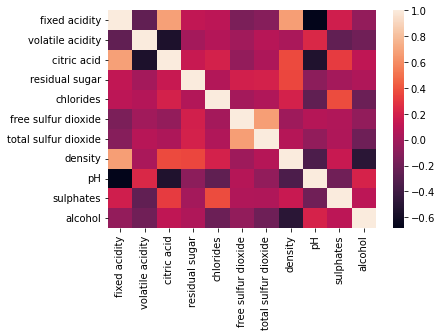

In [113]:
import seaborn as sns
sns.heatmap(correlation_matrix)

In [114]:
correlated_features_matrix = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.6:
            corr_col = correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

In [115]:
len(correlated_features_matrix
   )

4

In [116]:
print(correlated_features_matrix)

{'total sulfur dioxide', 'density', 'pH', 'citric acid'}


In [117]:
filtered_datasets = features.drop(correlated_features_matrix,axis=1)
filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


# Solving Regression problems in  ML

We all know that ML is a branch of AI that enables computer programs to automatically learn and improve from experiance

ML algorithms learn from datasets based on patterns identified from the datasets, make predictions on unseen data (i.e the test data)

ML algorithms can be broadly categorised into 2 types: Supervised Learning and Unsupervised Learning algorithm

Supervised ML algorithms are those algorothms where the input dataset and the corresponding output or true prdeiction is availible and the algo tries to find the relation between inptus and outputs

Unsupervised ML algo the true labels for the outputs are not known. Rather the algo tries to find similar pattern in the data. Clustering algo are a typical example of unsupervised learning.

Supervised learning algo are further divided into 2 types: regression algo and classification algo

Regression algo predicts a continuous value for eg, the price of a house, the bp of a person, and a student's score in a particular exam. However classification algo predicts discrete value sich as whether or not a tumor is malignant, whether a student is going to pass or fail an exam

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

# get dataset names from the seaborn library

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [119]:
# importnin the tips datasets
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
#Extract features
X = tips_df.drop(['tip'],axis=1)

#Extracting labels
y = tips_df['tip']

In [121]:
X.head()


,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [122]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [123]:
numerical = X.drop(['sex','smoker','day','time'],axis=1)
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [124]:
categorical = X.filter(['sex','smoker','day','time'])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [125]:
#Performing one-hot encoding
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first =True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


In [126]:
# the final step is to join the numrical columns with the not encoded columns

X  = pd.concat([numerical,cat_numerical],axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [127]:
#Dividing data into trianing as test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

Data Scaling/Noramalisation

final step before the data is passed to ML algo is to sclae the data. You can see that some of the columns of the dataset 
contain small values, while the other contain large valies . It is better to convert all the values to a uniform scale.

In [128]:
#feature scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LINEAR REGRESSION -> Linear regression is linear model that assumes a linear relationships between inputs and outputs and minimises the cost of error between the predicted and actual output using functions like mean absolute error

Why use linear regression ?

1) Linear regression is simple to implement and easily implementable algo

2) It takes less time to train the model even for huge datasets

3) Linear regression coefficients are easy to interpret

Disadvantages

1) Performance is easily affected by outlier presence

2) Assumes a linear relationship between dependent and independent variables which can result in an increased error

In [129]:
#Importing the linear regression  model from sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#training the model
regressor = lin_reg.fit(X_train,y_train)

# making predictions on the test set
y_pred = regressor.predict(X_test)

Mean Absolute Error - It is calculated by taking the avg of absolute error obtained by subtracting real values from the predicted values

Mean Squared Error - similar to MAE..however the error for each record is squared in case of MSE in order to punish data reords with a huge difference between predicted and actual values

Root mean squared error - RMSE is simply the squre root of MSE

In [131]:
# Evaluating the model performance
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.6366762541802368
Mean Squared Error:  0.7159134231087634
Root Mean Squared Error:  0.8461166722791623


By looking at the MAE it can be concluded that on average there is an error of 0.63 for predictions, which means that on avg the predicted values are 0.63$ more or less than the actual tip values 

--------------------------

KNN Regression - KNN stands for K-nearest neighbours. KNN is a lazy learning algo, which is based on finding the Euclidean distance between different data points


In [ ]:
#importing the KNN model from sklearn
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

#training the model
regressor  = knn_reg.fit(X_train,y_train)

#making  predictions
y_pred = regressor.predict(X_test)

#evaluating model performance
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))

Random Forest Regression - Random forest is a tree based algo that converts features into tree nodes and then used entropy loss to make predictions

This algo is useful when:

1) you have lots of missing data or imbalanced dataset

2) with a large number of trees, you can avoid overfitting while training. Overfitting occurs when ML models performs better  on the  training dataset but worse on the test dataset.

3) random forest algorithms can be used  when you have very higher-dimensional data

4) Through cross-validation the random forest can return higher accuracy

5) Random forest algo can solve both classification and regression tasks and finds it applications in a variety of tasks ranging from credit card fraud detection, stock market prediction, find fraudulent online transcations

Disadvantages:

1) Using a large number of treess can slow down  the algo

2) Random forest algo is a predictive algo which can only predict the future but cannot explain what happend in the past using  the dataset

In [ ]:
#importing random forest algo from sklearn
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 42, n_estimators = 500)

#training the model
regressor = rf_reg.fit(X_train,y_train)

#making the predictions on the test set
y_pred = regressor.predict(X_test)

#evaluating the model performance
#evaluating model performance
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))

The choice of algo we use depends totally on your dataset and evaluation metrics. Some algo perform better one one dataset while the other algo performs better on the other dataset. It is better that use all algo to see which gives the best result.
However as a rule of thump, if you only have limited options try starting with ensemble learning algos such as random forest because they yield the best results

#### Classification problems in ML

They are the problems where you have to predict a discrete value, i,e., whether the condition car is good or not. Whether or not a student will pass an exam.

Preaparing data for classification problems

Like regression, you have to convert data into a specific format before it can be used to train the classification algorithms

### Churn Modelling

In [ ]:
churn_df = pd.read_csv("Churn_Modelling.csv")
# THIS DATASET contains records of cutomers who left the bank 6 months after various info abt them is recorded
churn_df.head()

The output shows that the dataset contins info such as surname, customer id, geography, gender, etc.

The exited column (dependent variable) contains info abt whether or not the customer exited the bank after 6 months

We do not need row number, customer id,surname

In [ ]:
#removing unecessary columns
churn_df = churn_df.drop(["RowNumber","CustomerId","Surname"],axis = 1)

In [ ]:
# create feature set
X = churn_df.drop(['Exited'],axis=1)

#create label set
y = churn_df['Exited']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
#dropping categorical columns

numerical=X.drop(['Geography','Gender'],axis = 1)

numerical.head()

In [ ]:
# filtering categorical columns

categorical = X.filter(["Geography","Gender"])
categorical.head()

In [ ]:
#converting categorical to numeric

#converting categorical columns to one hot coded columns

import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

In [ ]:
# concating numerical columns with one-hot encoded columns
X = pd.concat([numerical,cat_numerical],axis =1)

X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

Data scaling / Normalisation: The last step before the data is passed to the machine learning algo is to sclae the data


In [ ]:
# applying standard scaling to the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

we have converted data into a format that can be used train machine learning algorithms for classification

## Binary Classification Algorithms

Binary Classification problems - these are those classification problems where there are only two possible values for the output label. E.g. whether a team will win or lose, whether a customer will churn or not 

## Logistic Regression

Logistic regression is a linear model which makes classification by passing the output of linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

# training the logistic regression classifier
classifier= log_clf.fit(X_train,y_train)

# making predictions on the test set
y_pred = classifier.predict(X_test)

Once you have trained a model and have made predictions on the testset, the next step is to know how well your model performed had perfomed for making predictions on the unknown test set. There are various metrics to evaluate a classifier model.

These are F1 score,recall,precision, accuracy and confusion matrix

------------------------------------------------

---